## Boston House Prices Prediction

In [1]:
# Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.19.2
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.23.2


In [3]:
# get the boston houses dataset from sklearns dataset library
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

## Data Exploration

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['MEDV'] = boston_data.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# check for missing variables
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# Get the numerical data
len(list(df._get_numeric_data().columns))

14

Note:
- We can see that all columns in this data set, are numerical.
- We can now proceed to exploring their probability density functions
- We can use df.hist() function to see the histogram of all columns in the dataset or sns.distplot(df["column_name"]), to plot the distribution of individual columns

### Scale the Data

In [10]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
x_scaled = scaler.transform(X)
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Split, train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state = 0)

### Feature Importance - By "feature_importances_" technique

In [16]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
y_hat = forest_model.predict(X_test)

In [17]:
forest_model.feature_importances_

array([0.04609262, 0.00092831, 0.00764986, 0.00078646, 0.02181463,
       0.34638084, 0.01338468, 0.03901156, 0.0032354 , 0.01667621,
       0.01948622, 0.00972422, 0.47482898])

In [18]:
result = pd.DataFrame(forest_model.feature_importances_, X.columns)
result.columns = ['feature'] 

In [19]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.474829
RM,0.346381
CRIM,0.046093
DIS,0.039012
NOX,0.021815
PTRATIO,0.019486
TAX,0.016676
AGE,0.013385
B,0.009724
INDUS,0.007650


<AxesSubplot:>

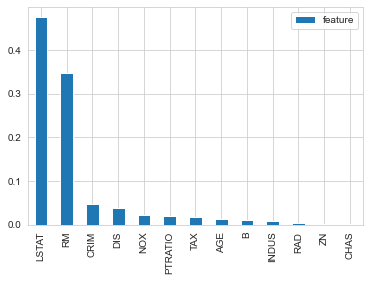

In [20]:
result.sort_values(by="feature", ascending=False).plot(kind="bar")

We can see that the ZN and CHAS variables are the least important. So we drop them.

In [21]:
# Calculate R square of forest model with all features
print(f"R square: {round(forest_model.score(X_test,y_test), 2)}")

R square: 0.76


## Forest model with the top 10 features

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
new_columns = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [24]:
data2 = df[new_columns]
data2.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [25]:
y2 = data2["MEDV"]
X2 = data2.drop(["MEDV"], axis=1)

In [26]:
X2.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


### Scale the Data

In [27]:
scaler2 = StandardScaler()
scaler2.fit(X2)

x_scaled2 = scaler2.transform(X2)

### Split, train and test

In [28]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state = 1)

In [29]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

forest_model2 = RandomForestRegressor(random_state=1)
forest_model2.fit(X_train2, y_train2)
y_hat2 = forest_model2.predict(X_test2)

In [30]:
# Calculate R square of forest model with all features
print(f"Forest model 1: R square: {round(forest_model.score(X_test,y_test), 2)}")
print(f"Forest model 2: R square: {round(forest_model2.score(X_test2,y_test2), 2)}")

Forest model 1: R square: 0.76
Forest model 2: R square: 0.91


We can see that after removing the ZN, CHAS and RAD variable, the R2 score increased by 15%.

In [31]:
result_df = pd.DataFrame(y_hat2)
result_df.columns = ["Predicted"]
result_df["Actual"] = y_test2.reset_index(drop=True)
result_df.head()

,Predicted,Actual
0,29.606,28.2
1,27.824,23.9
2,20.310,16.6
3,20.546,22.0
4,19.755,20.8


### Validation
We validate to see the relationship between the train_y and the y_hat variables,

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


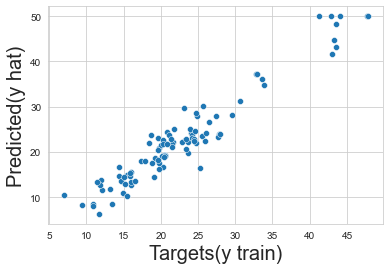

In [32]:
sns.scatterplot(y_hat2, y_test2)
plt.xlabel("Targets(y train)", fontsize=20)
plt.ylabel("Predicted(y hat)", fontsize=20)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

### Second Check (The Residual Plot PDF)
This is the difference between the target and the predicted values (The Error)

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


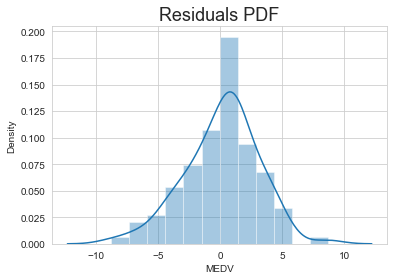

In [33]:
sns.distplot(y_hat2-y_test2)
plt.title("Residuals PDF", size=18)
plt.show()

# Model Selection

In [34]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [35]:
def Model(x, y, name, model):
    model.fit(x, y)
#     model.predict(x)
    print(f"{name} R square: {round(model.score(x, y), 2)}")
    
    

Linear_models = {"LinearRegression":LinearRegression(),
                 "RandomForestRegresson":RandomForestRegressor(),
                 "LGBMRegressor":LGBMRegressor(),
                 "XGBRegressor":XGBRegressor(),
                 "KernelRidge":KernelRidge(),
                 "ElasticNet":ElasticNet(),
                 "BayesianRidge":BayesianRidge(),
                 "GradientBoostingRegressor":GradientBoostingRegressor(),
                 "CatBoostRegressor":CatBoostRegressor(verbose=0),
                }


for name, model in Linear_models.items():
    Model(X_train2, y_train2, name, model)

LinearRegression R square: 0.71
RandomForestRegresson R square: 0.98
LGBMRegressor R square: 0.98
XGBRegressor R square: 1.0
KernelRidge R square: 0.68
ElasticNet R square: 0.66
BayesianRidge R square: 0.7
GradientBoostingRegressor R square: 0.98
CatBoostRegressor R square: 1.0


<strong>Note</strong>

The XGBRegressor and the CatBoostRegressor have an R score of 1, Therefore they are the best performing model on this dataset,

And we will also consider the LGBMRegressor and GradientBoostinRegressor which both has an R score of 0.98

## Testing

### XGB

In [36]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_hat_xgb = XGBModel.predict(X_test2)

In [38]:
result_df_xgb = pd.DataFrame(y_hat_xgb)
result_df_xgb.columns = ["Predicted"]
result_df_xgb["Actual"] = y_test2.reset_index(drop=True)
result_df_xgb.head()

,Predicted,Actual
0,30.275238,28.2
1,27.083267,23.9
2,19.678194,16.6
3,20.482948,22.0
4,23.989750,20.8


In [39]:
round(XGBModel.score(X_test2, y_test2), 2)

0.91

In [40]:
# Calculate RMSE
print(round(np.sqrt(metrics.mean_squared_error(y_test2, y_hat_xgb)), 2))

3.06


### CatBoost

In [41]:
CatBoostModel = CatBoostRegressor(verbose=0)
CatBoostModel.fit(X_train2, y_train2)

In [42]:
y_hat_CB = CatBoostModel.predict(X_test2)

In [43]:
result_df_CatBoost = pd.DataFrame(y_hat_xgb)
result_df_CatBoost.columns = ["Predicted"]
result_df_CatBoost["Actual"] = y_test2.reset_index(drop=True)
result_df_CatBoost[["Actual", "Predicted"]].head()

,Actual,Predicted
0,28.2,30.275238
1,23.9,27.083267
2,16.6,19.678194
3,22.0,20.482948
4,20.8,23.989750


In [44]:
CatBoostModel.score(X_test2, y_test2)

0.9093291381275657

In [45]:
# Calculate RMSE
print(round(np.sqrt(metrics.mean_squared_error(y_test2, y_hat_CB)), 2))

2.99


In [46]:
# Compare R square of XGB and CatBoost model
print(f"XGB Model: R square: {round(XGBModel.score(X_test2,y_test2), 3)}, RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test2, y_hat_xgb)), 2)}")
print(f"CatBoostModel: R square: {round(CatBoostModel.score(X_test2,y_test2), 3)}, RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test2, y_hat_CB)), 2)}")

XGB Model: R square: 0.905, RMSE: 3.06
CatBoostModel: R square: 0.909, RMSE: 2.99


- We can see that the CatBoost Model outperformed the XGB model
- Therefore the CatBoost Model, is the best for this project.